# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### First, load in all the data.

In [3]:
path = "data/cleaned/"


house_df = pd.read_csv(path + "house_df.csv")
insecurity_df = pd.read_csv(path + "insecurity_df.csv")
insurance_df = pd.read_csv(path + "insurance_df.csv")
lead_df = pd.read_csv(path + "2021-blood-lead-by-state-county.csv", encoding="ISO-8859-1")
parent_df = pd.read_csv(path + "parent_df.csv")
poverty_df = pd.read_csv(path + "poverty_df.csv")


lead_df.head()

,State,County,Total Population of Children <72 Months of Age,Number of Children Tested <72 Months of Age,Number of Children with Confirmed BLLs ³5 µg/dL,Percent of Children with Confirmed BLLs ³5 µg/dL,Number of Children with Confirmed BLLs ³10 µg/dL,Percent of Children with Confirmed BLLs ³10 µg/dL,Number of Children with Confirmed BLLs 5-9 µg/dL,Number of Children with Confirmed BLLs 10-14 µg/dL,Number of Children with Confirmed BLLs 15-19 µg/dL,Number of Children with Confirmed BLLs 20-24 µg/dL,Number of Children with Confirmed BLLs 25-44 µg/dL,Number of Children with Confirmed BLLs ³45 µg/dL
0,AL,Autauga,4045,238,SD,SD,SD,SD,0,SD,0,0,0,0
1,AL,Baldwin,14651,552,SD,SD,0,0.00%,SD,0,0,0,0,0
2,AL,Barbour,1571,268,SD,SD,SD,SD,0,SD,SD,0,0,0
3,AL,Bibb,1459,105,SD,SD,SD,SD,0,SD,0,0,0,0
4,AL,Blount,4148,365,0,0.00%,0,0.00%,0,0,0,0,0,0


In [4]:
datasets = [house_df, insecurity_df, insurance_df, lead_df, parent_df, poverty_df]
dataset_names = ["House", "Insecurity", "Insurance", "Lead", "Parent", "Poverty"]

for name, df in zip(dataset_names, datasets):
    print(f"\n📌 {name} Overview:")
    print(df.info())
    print("="*100)


📌 House Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 1903 non-null   object 
 1   County                                1904 non-null   object 
 2   Built 2020 or later                   1903 non-null   float64
 3   Built 2000 to 2019                    1903 non-null   float64
 4   Built 1980 to 1999                    1903 non-null   float64
 5   Built 1960 to 1979                    1903 non-null   float64
 6   Built 1940 to 1959                    1903 non-null   float64
 7   Built 1939 or earlier                 1903 non-null   float64
 8   Lacking complete plumbing facilities  1904 non-null   float64
 9   Lacking complete kitchen facilities   1904 non-null   float64
 10  House PriceLess than $50,000          1904 non-null   float64
 11

In [5]:
# Remove '%' from all values
lead_df = lead_df.replace('%', '', regex=True)
lead_df.replace("SD", np.nan, inplace=True)


In [6]:
# Convert all columns to numeric except "State" and "County"
columns_to_exclude = ["State", "County"]
numeric_columns = lead_df.columns.difference(columns_to_exclude)

# Apply numeric conversion only to relevant columns
lead_df[numeric_columns] = lead_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

lead_df.describe()

,Total Population of Children <72 Months of Age,Number of Children Tested <72 Months of Age,Number of Children with Confirmed BLLs ³5 µg/dL,Percent of Children with Confirmed BLLs ³5 µg/dL,Number of Children with Confirmed BLLs ³10 µg/dL,Percent of Children with Confirmed BLLs ³10 µg/dL,Number of Children with Confirmed BLLs 5-9 µg/dL,Number of Children with Confirmed BLLs 10-14 µg/dL,Number of Children with Confirmed BLLs 15-19 µg/dL,Number of Children with Confirmed BLLs 20-24 µg/dL,Number of Children with Confirmed BLLs 25-44 µg/dL,Number of Children with Confirmed BLLs ³45 µg/dL
count,1496.000000,1473.000000,813.000000,813.000000,920.000000,920.000000,836.000000,1007.000000,1171.000000,1272.000000,1281.000000,1434.000000
mean,7140.614973,1153.939579,23.813038,1.269865,4.770652,0.199457,16.706938,2.243297,0.479078,0.190252,0.191257,0.024407
std,18903.847015,4577.822931,82.926295,2.265628,20.546044,0.814791,64.283366,10.726465,3.717392,1.800856,2.293016,0.490059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,815.500000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.500000,229.000000,6.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5182.750000,653.000000,16.000000,1.800000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,362191.000000,88484.000000,1305.000000,39.000000,331.000000,19.500000,974.000000,174.000000,74.000000,36.000000,46.000000,14.000000


In [7]:
# Ensure "State" and "County" are strings in all datasets
for df in [house_df, insecurity_df, insurance_df, parent_df, poverty_df, lead_df]:
    df["State"] = df["State"].astype(str).str.strip()
    df["County"] = df["County"].astype(str).str.strip()

# Merge all datasets on "State" and "County" using a left join (keeping all counties in lead_df)
merged_df = lead_df.merge(house_df, on=["State", "County"], how="left") \
                   .merge(insecurity_df, on=["State", "County"], how="left") \
                   .merge(insurance_df, on=["State", "County"], how="left") \
                   .merge(parent_df, on=["State", "County"], how="left") \
                   .merge(poverty_df, on=["State", "County"], how="left")

merged_df.shape

(1496, 69)

### Examine missing values.

<Figure size 1200x600 with 0 Axes>

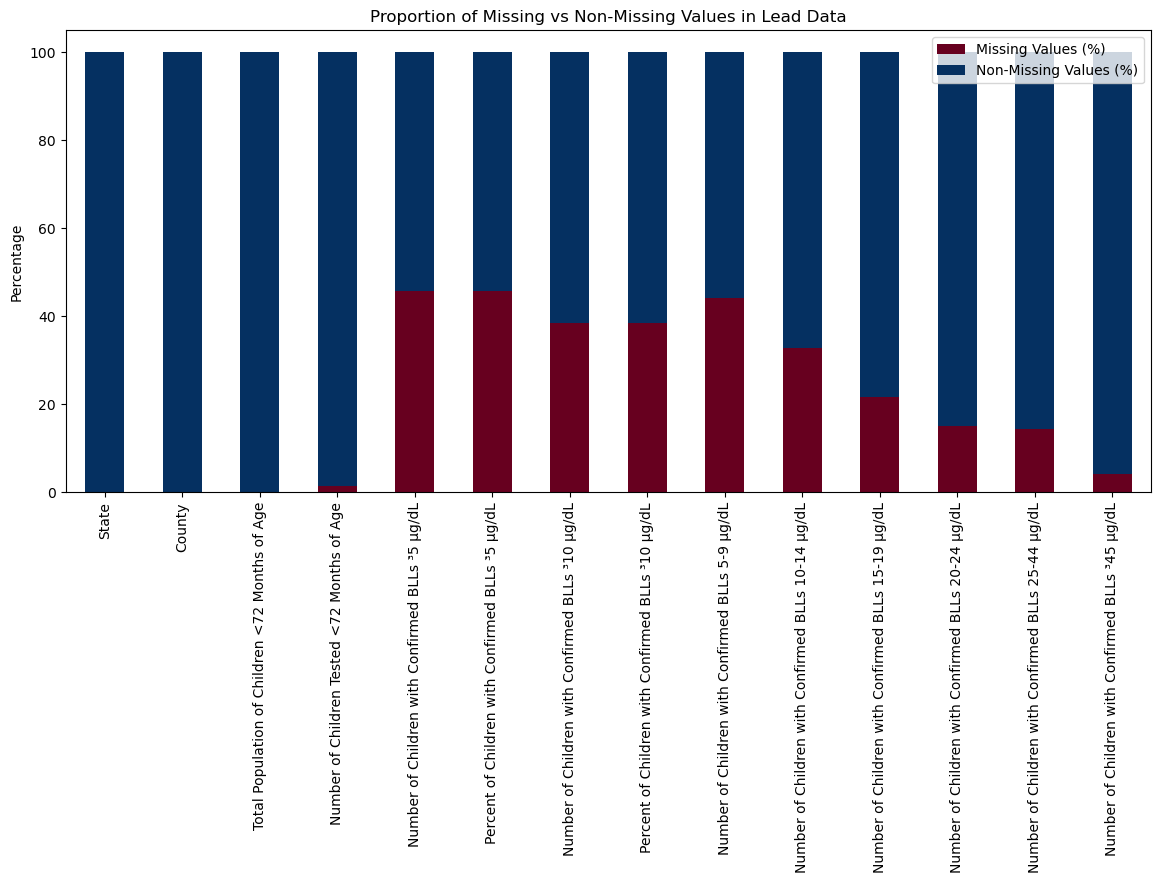

In [8]:
# Calculate percentage of missing and non-missing values
null_counts = lead_df.isnull().sum()
total_counts = lead_df.shape[0]
null_percentage = (null_counts / total_counts) * 100
non_null_percentage = 100 - null_percentage

null_summary_df = pd.DataFrame({"Missing Values (%)": null_percentage, "Non-Missing Values (%)": non_null_percentage})

plt.figure(figsize=(12, 6))
null_summary_df.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="RdBu")
plt.title("Proportion of Missing vs Non-Missing Values in Lead Data")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend(["Missing Values (%)", "Non-Missing Values (%)"])
plt.show()

### Look at correlations.

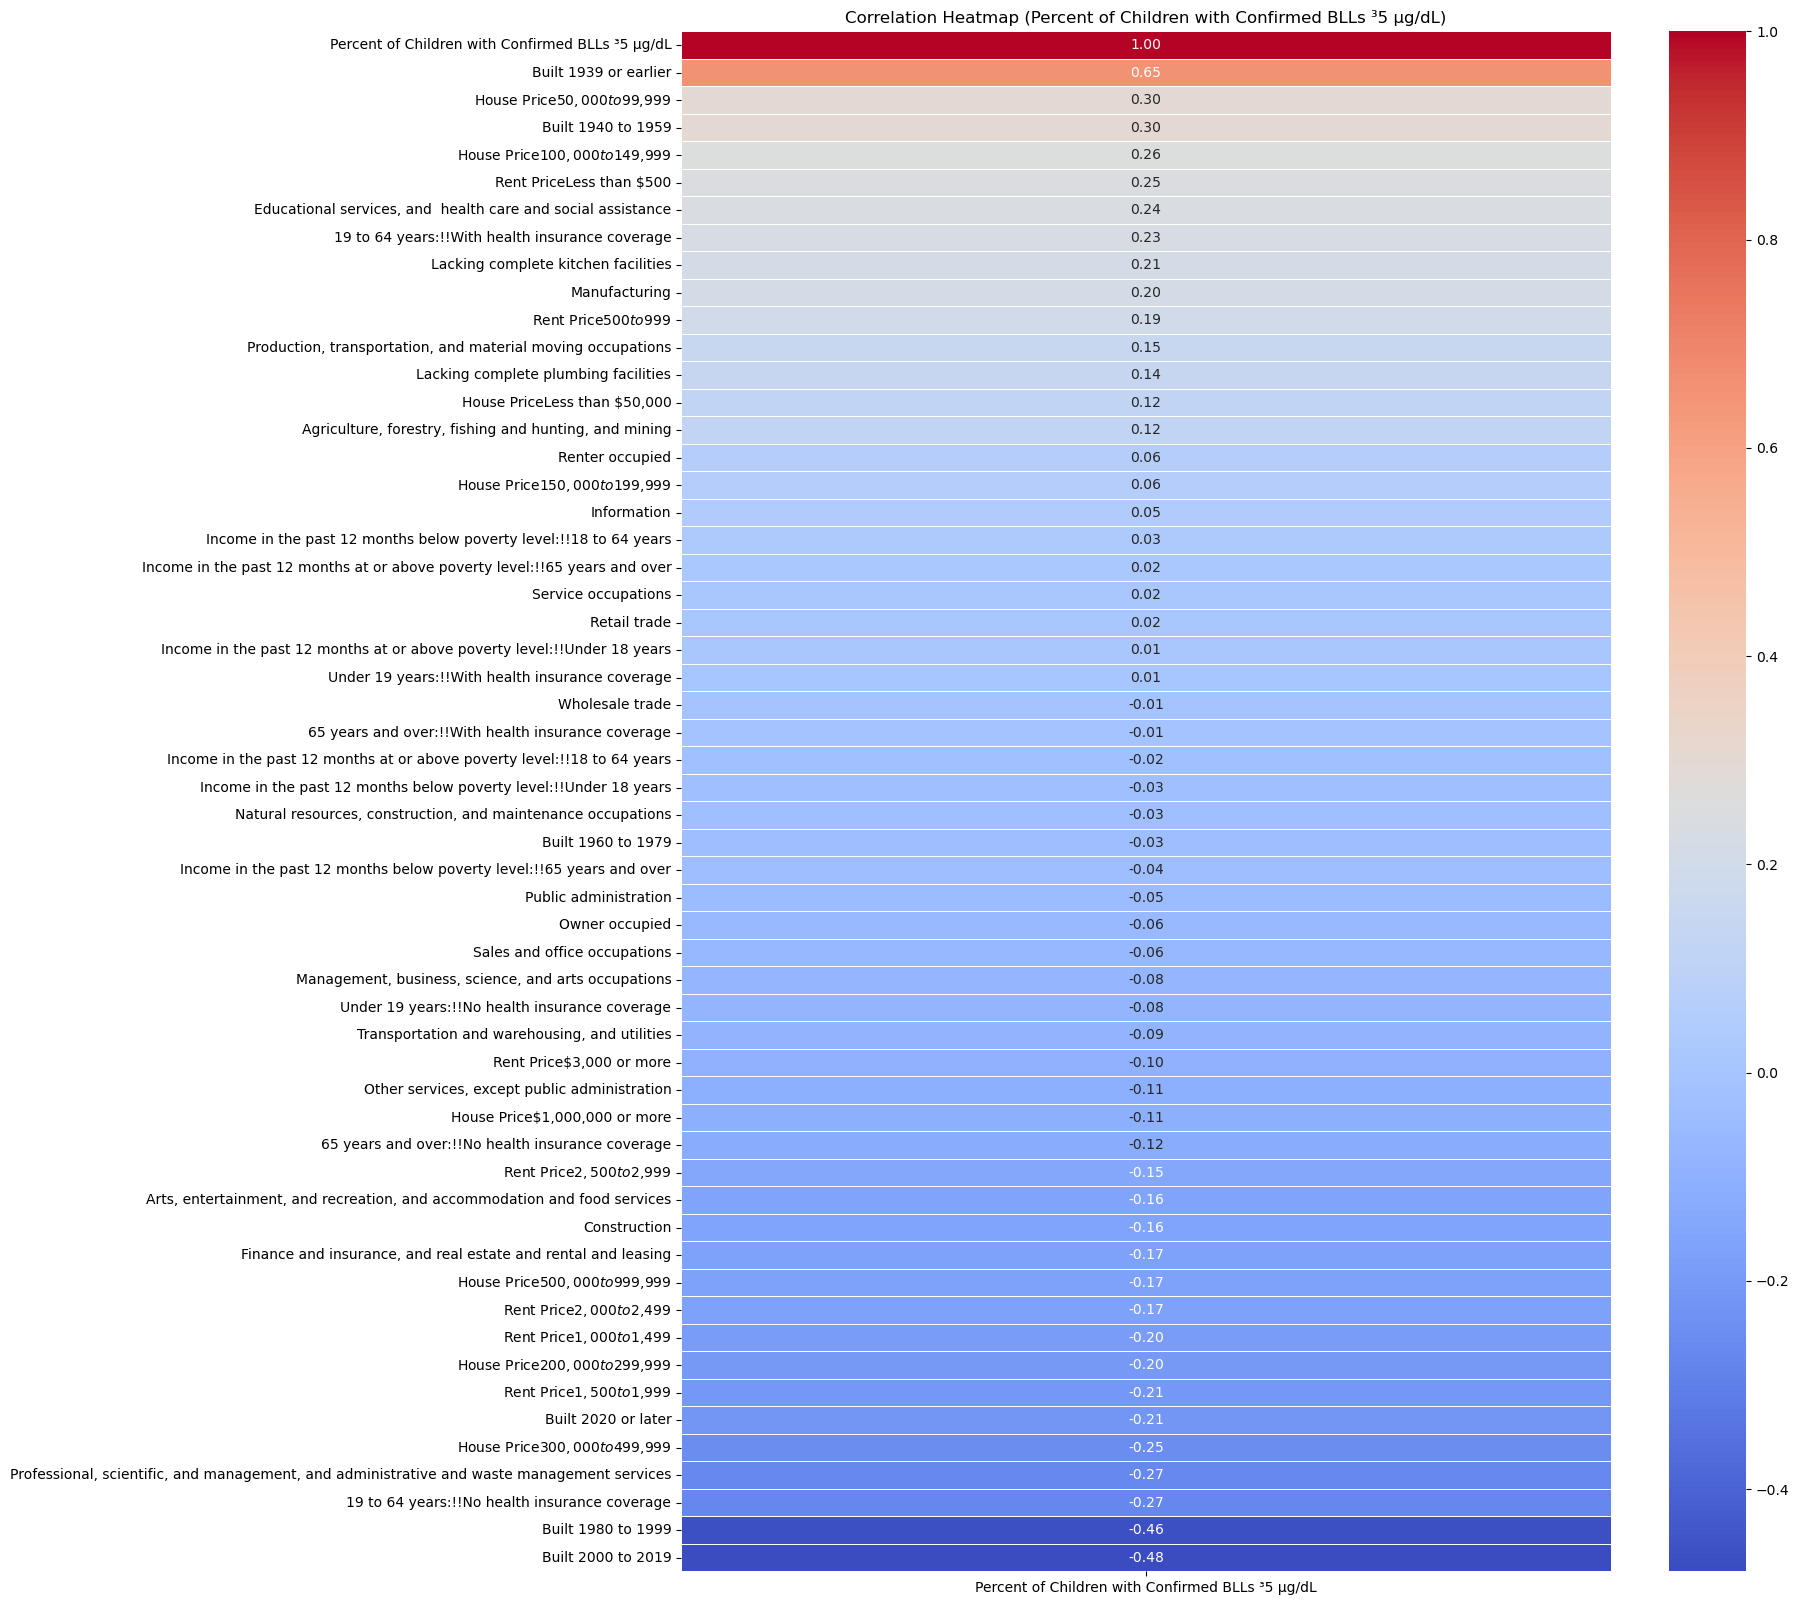

In [9]:
# Identify lead-related columns (excluding the target variable)
lead_columns_to_exclude_5 = lead_df.columns.difference(["State", "County", "Percent of Children with Confirmed BLLs ³5 µg/dL"])
filtered_merged_df_5 = merged_df.drop(columns=lead_columns_to_exclude_5, errors="ignore")

# Keep only numeric columns
numeric_filtered_df_5 = filtered_merged_df_5.select_dtypes(include=[np.number])

# Compute correlation with "Percent of Children with Confirmed BLLs ³5 µg/dL"
correlation_matrix_5 = numeric_filtered_df_5.corr()
target_corr_5 = correlation_matrix_5[["Percent of Children with Confirmed BLLs ³5 µg/dL"]].sort_values(
    by="Percent of Children with Confirmed BLLs ³5 µg/dL", ascending=False
)

plt.figure(figsize=(15, 20))
sns.heatmap(target_corr_5, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Percent of Children with Confirmed BLLs ³5 µg/dL)")
plt.show()

### Look at individual states.

In [10]:
il_merged_df = merged_df[merged_df.State=='IL']
il_merged_df.head()

,State,County,Total Population of Children <72 Months of Age,Number of Children Tested <72 Months of Age,Number of Children with Confirmed BLLs ³5 µg/dL,Percent of Children with Confirmed BLLs ³5 µg/dL,Number of Children with Confirmed BLLs ³10 µg/dL,Percent of Children with Confirmed BLLs ³10 µg/dL,Number of Children with Confirmed BLLs 5-9 µg/dL,Number of Children with Confirmed BLLs 10-14 µg/dL,...,Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Income in the past 12 months below poverty level:!!Under 18 years,Income in the past 12 months below poverty level:!!18 to 64 years,Income in the past 12 months below poverty level:!!65 years and over,Income in the past 12 months at or above poverty level:!!Under 18 years,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over
340,IL,Adams,4796,662.0,35.0,5.3,10.0,1.5,25.0,6.0,...,0.189378,0.201617,0.089536,0.154143,0.027137,0.058930,0.020169,0.197553,0.518326,0.177884
341,IL,Alexander,333,63.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,IL,Bond,925,151.0,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,IL,Boone,3479,498.0,13.0,2.6,NaN,NaN,12.0,NaN,...,0.164634,0.182976,0.077272,0.283613,0.060614,0.070004,0.014449,0.170247,0.532913,0.151774
344,IL,Brown,368,54.0,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


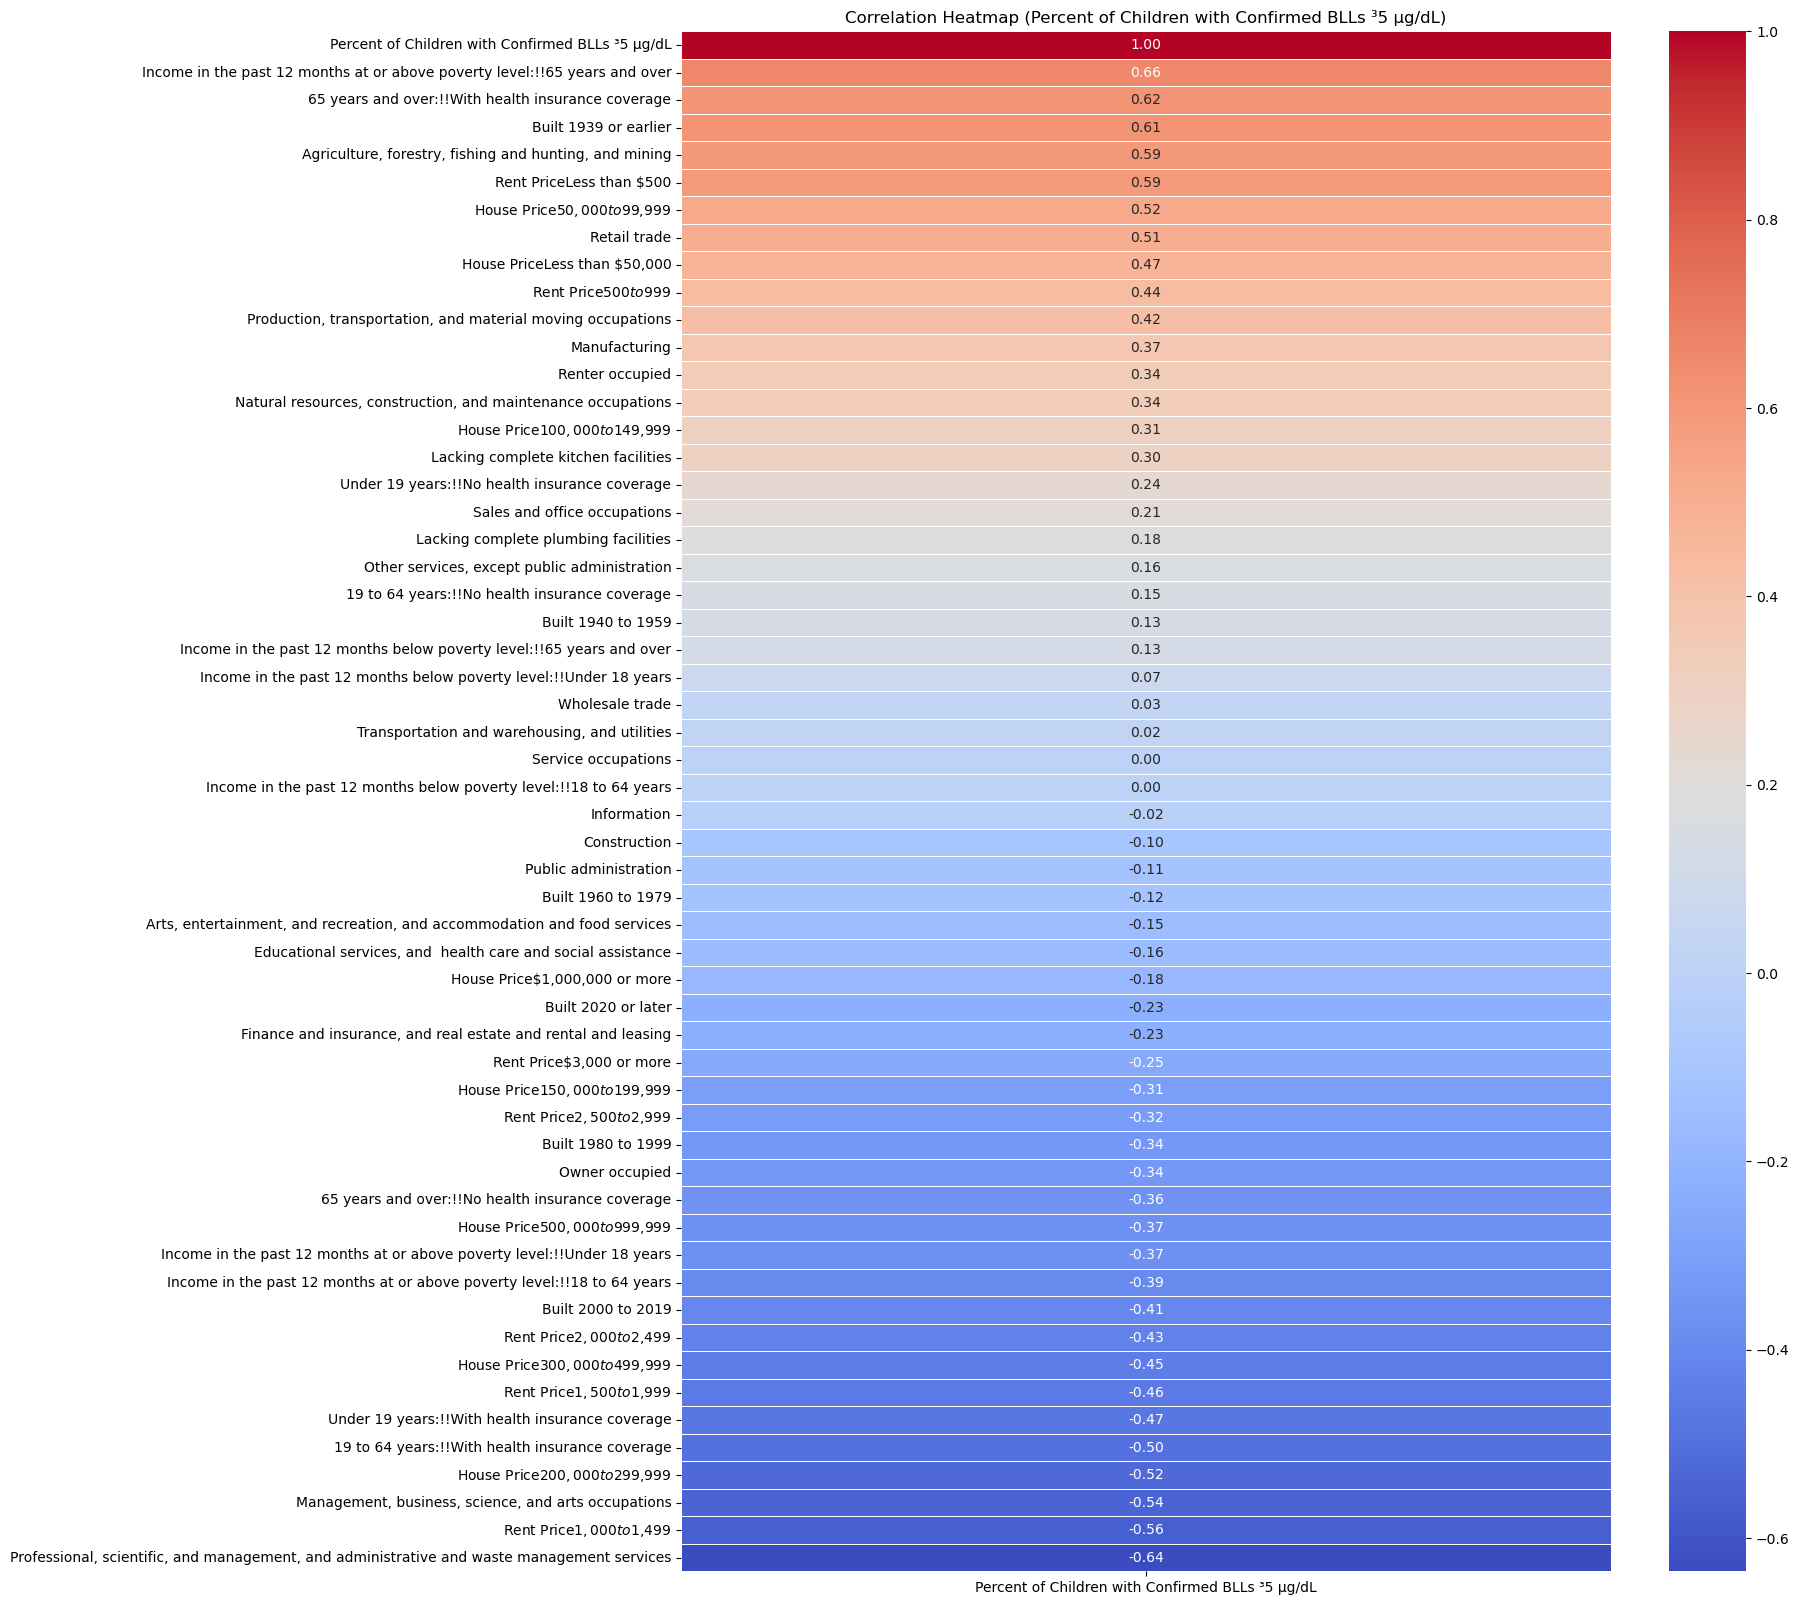

In [11]:
# Identify lead-related columns (excluding the target variable)
lead_columns_to_exclude_5 = lead_df.columns.difference(["State", "County", "Percent of Children with Confirmed BLLs ³5 µg/dL"])
il_filtered_merged_df_5 = il_merged_df.drop(columns=lead_columns_to_exclude_5, errors="ignore")

# Keep only numeric columns
il_numeric_filtered_df_5 = il_filtered_merged_df_5.select_dtypes(include=[np.number])

# Compute correlation with "Percent of Children with Confirmed BLLs ³5 µg/dL"
il_correlation_matrix_5 = il_numeric_filtered_df_5.corr()
il_target_corr_5 = il_correlation_matrix_5[["Percent of Children with Confirmed BLLs ³5 µg/dL"]].sort_values(
    by="Percent of Children with Confirmed BLLs ³5 µg/dL", ascending=False
)

plt.figure(figsize=(15, 20))
sns.heatmap(il_target_corr_5, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Percent of Children with Confirmed BLLs ³5 µg/dL)")
plt.show()

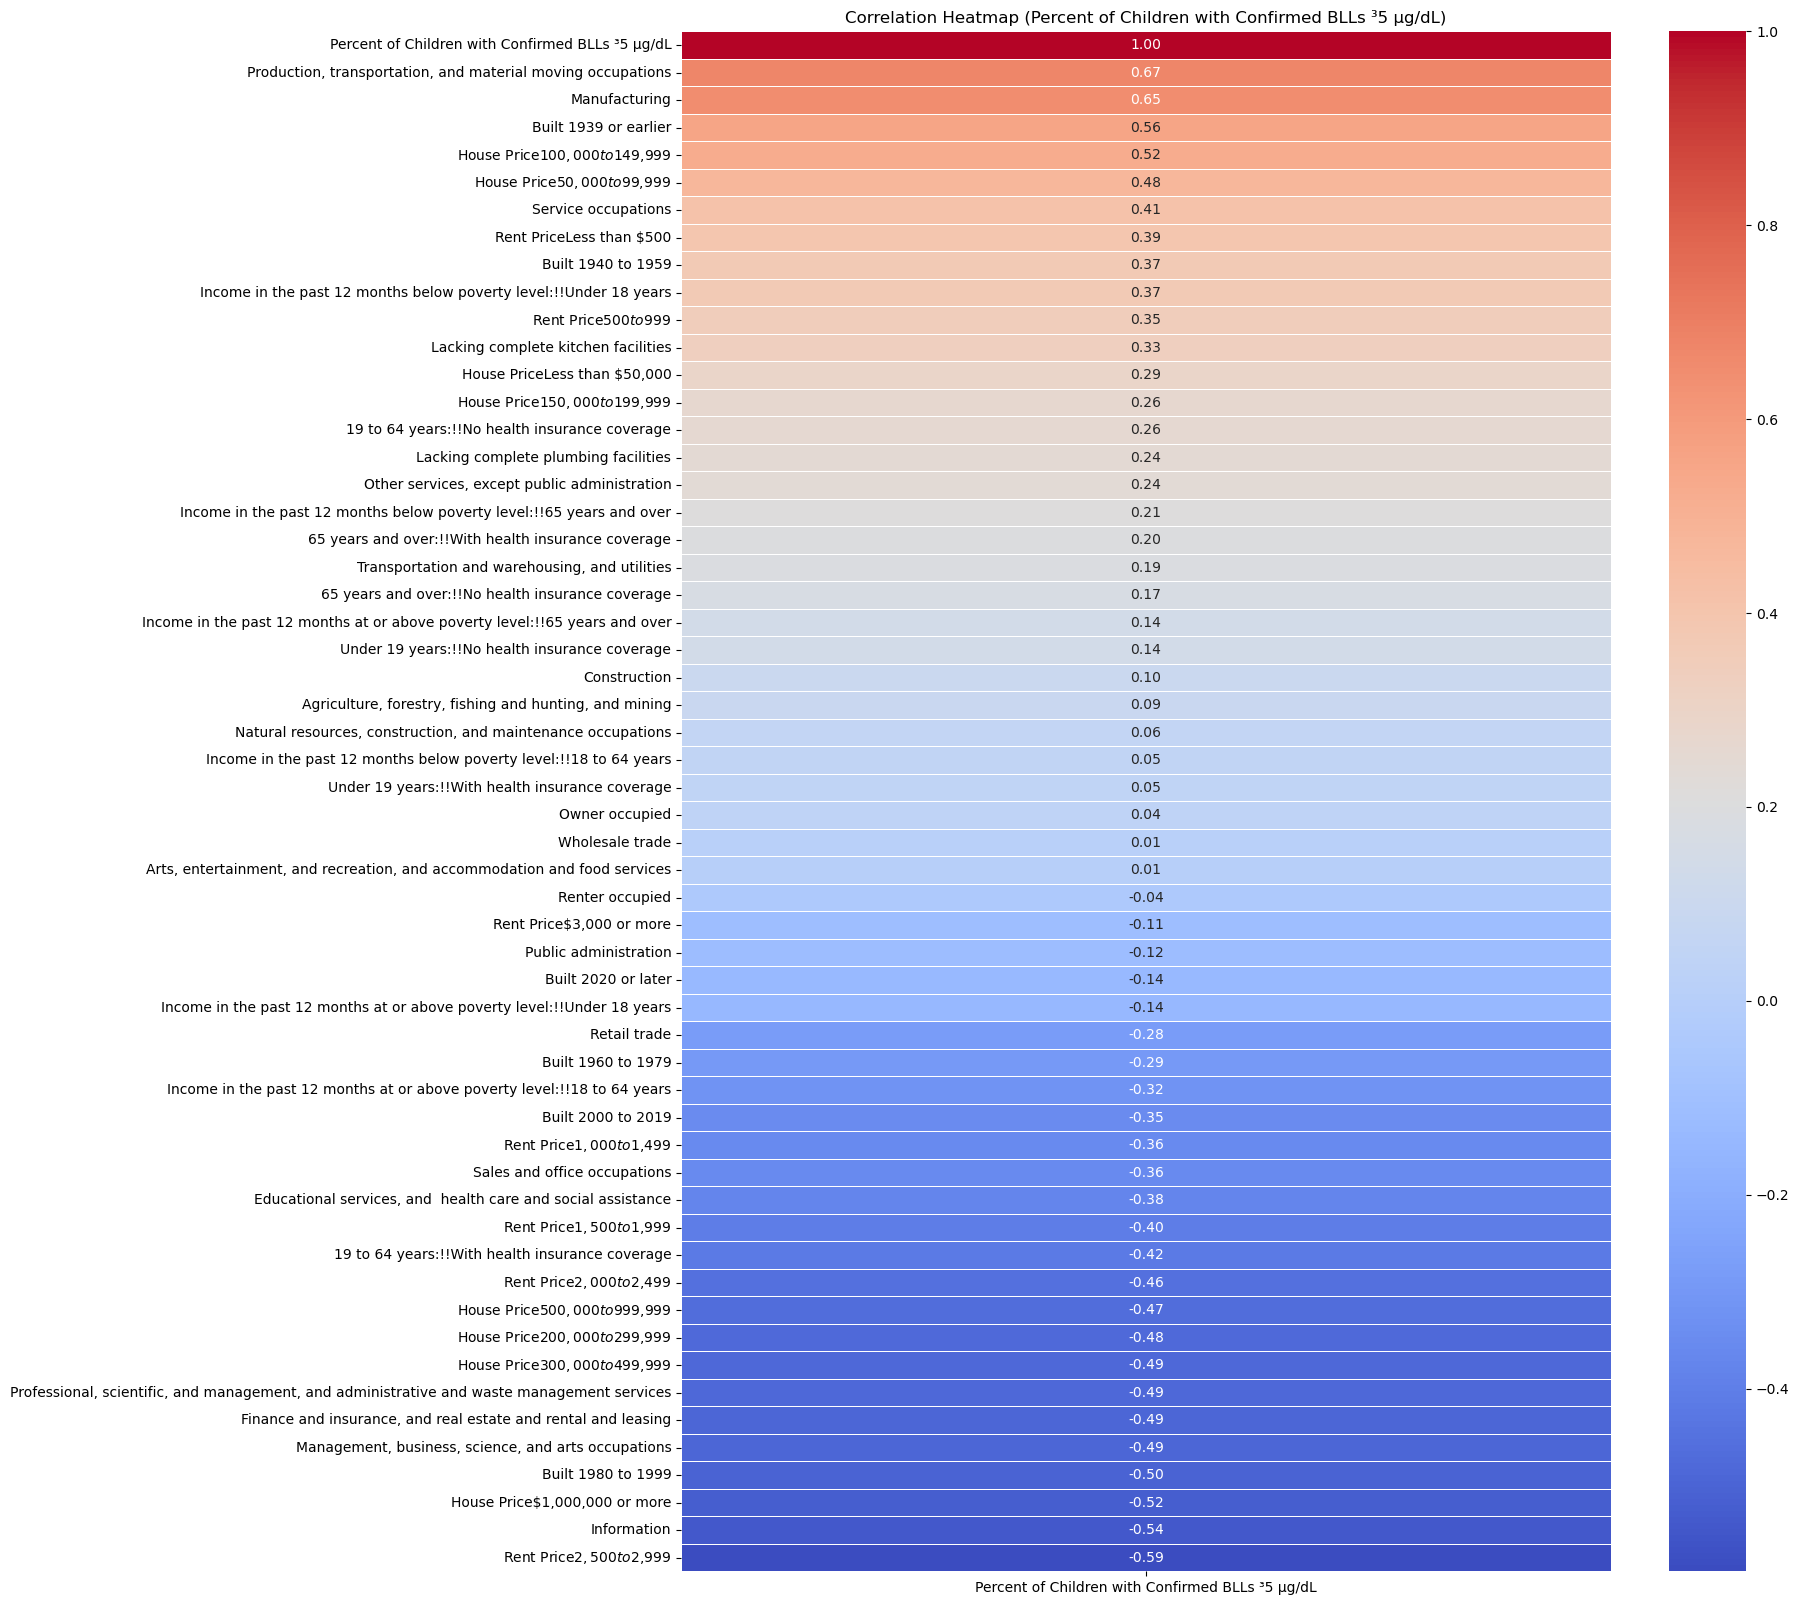

In [12]:
wi_merged_df = merged_df[merged_df.State=='WI']
wi_filtered_merged_df_5 = wi_merged_df.drop(columns=lead_columns_to_exclude_5, errors="ignore")

# Keep only numeric columns
wi_numeric_filtered_df_5 = wi_filtered_merged_df_5.select_dtypes(include=[np.number])

# Compute correlation with "Percent of Children with Confirmed BLLs ³5 µg/dL"
wi_correlation_matrix_5 = wi_numeric_filtered_df_5.corr()
wi_target_corr_5 = wi_correlation_matrix_5[["Percent of Children with Confirmed BLLs ³5 µg/dL"]].sort_values(
    by="Percent of Children with Confirmed BLLs ³5 µg/dL", ascending=False
)

plt.figure(figsize=(15, 20))
sns.heatmap(wi_target_corr_5, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Percent of Children with Confirmed BLLs ³5 µg/dL)")
plt.show()